js 05252017 v1
Set up a set of functions that we might want to use for general preprocessing of data. Then some other stuff to deal with importing .mat files and converting into npy files so that we can use the numpy load/save functions.

Now do everything else from reading in mat data to classification...could easily adapt this to loop over subjects and visual areas using a for loop at the top and just defining the input mat file names for each subject/area (or if one mat file per subject that has data from all areas then you just need to change the second call to readMatData which dictates what field to read out of the mat file)...
These data files are from one of RR's studies from V1 where she used an independent localizer task as a training set and then a WM task as test data. The orientations are drawn (with some constraint) from a uniform distribution over 1:180 (in matlab style 1-based indexing...here need to make this a 0:179 space) 

reading and converting: locDat.mat
reading and converting: locOri.mat
reading and converting: wmDat.mat
reading and converting: wmOri.mat
Accuracy =  0.38271604938271603
Chance Accuracy =  0.16666666666666666


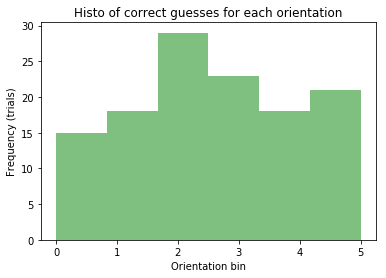

In [5]:
# import libs
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm
import labtools as lt

# read in the data from mat files and then save out as npy files...
locDat = lt.readMatData('locDat.mat', 'locDatIEM', 'locDat')
locOri = lt.readMatData('locOri.mat', 'locOriIEM', 'locDatOri')

# read in data from the WM task
wmDat = lt.readMatData('wmDat.mat', 'wmDatIEM', 'locDat')
wmOri = lt.readMatData('wmOri.mat', 'wmOriIEM', 'wmDatOri')

# then sort the trial labels into discrete bins where mod 180/num_bins == 0  
num_bins = 6
locOri_binned = lt.binOrientations(locOri, 6)
wmOri_binned = lt.binOrientations(wmOri, 6)

# could scale the data if you want...
# locDat = scaleData(locDat,0,1)
# wmDat = scaleData(wmDat,0,1)

# Now define a classifier, then train and test 
clf = svm.LinearSVC(C=1.0, multi_class='crammer_singer')
#clf = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovo')   #rbf kernel with one vs one scheme

# fit the model
clf.fit(locDat, locOri_binned) 

# test the model
pred_labels = clf.predict(wmDat)  

# this will return the orientation of each correct classification guess. 
classCorrect = [i for i, j in zip(pred_labels, wmOri_binned) if i == j]

# compute accuracy
acc = len(classCorrect)/len(wmOri_binned)

print("Accuracy = ",acc)
print("Chance Accuracy = ",1/num_bins)

# then output a plot of how many correct guesses were made for each orienation bin. 
plt.hist(classCorrect, num_bins, normed=0, facecolor='green', alpha=.5)          # plot 1st row of data (response on each of 320 trials)
plt.title('Histo of correct guesses for each orientation')
plt.xlabel('Orientation bin')
plt.ylabel('Frequency (trials)')
plt.show()